In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine Learning\\datasets\\titanic\\train.csv')

In [27]:
print(df.info())
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Training Dataset Analysis:
1. Training dataset has 5 categorical and 7 numerical features out of which one is target variable viz. 'Survived'.
2. Cabin, Age & Embarked column has less entries, i.e. these columns have missing values.
3. Age is in fractions if its less than 1.
4. Age column has some outliers which may affect our model.
5. We have to process the NaN values in the Cabin column.
6. We have to convert the categorical values into numerical ones so that our model can built on top of it.

In [63]:
print('% of missing values in Age column are: ',(round((df['Age'].isnull().sum()/891)*100,2)),'%')
print('% of missing values in Cabin column are: ',(round((df['Cabin'].isnull().sum()/891)*100,2)),'%')
print('% of missing values in Embarked column are: ',(round((df['Embarked'].isnull().sum()/891)*100,2)),'%')

% of missing values in Age column are:  19.87 %
% of missing values in Cabin column are:  77.1 %
% of missing values in Embarked column are:  0.22 %


## From above %, we can say:
1. Our train dataset has too many values missing in the Cabin Column, so we should drop that column.
2. Embarked has very less % of missing values which can be filled with any of the three distinct values.
3. Age column should be smartly filled since it might be one of the key feature for our predictive model.

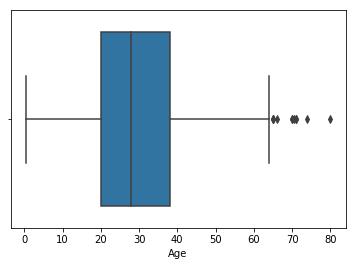

In [64]:
sns.boxplot(x='Age', data=df)

### General Logic says:
1. Age, Sex, Pclass must be one of the key feature for the determining whether a person survived or not.
2. There is no use of having PassengerId, Name and Ticket Number.
3. Pclass can be one of the important feature for our model as one who has paid more has high chance of being rescued.

In [73]:
# Let's drop the non-correlated columns... and also the Cabin column as mentioned above.
df.drop(labels=['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Out of 314 females, % of females survived:  0.74
Out of 577 males, % of males survived:  0.19


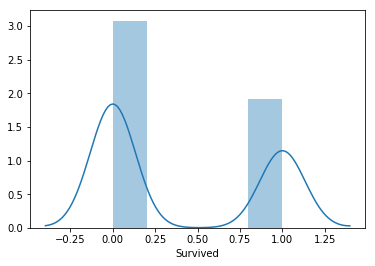

In [95]:
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']
sns.distplot(df['Survived'])
print('Out of',len(female),'females, % of females survived: ', round(len(female[female['Survived'] == 1])/len(female),2))
print('Out of',len(male),'males, % of males survived: ', round(len(male[male['Survived'] == 1])/len(male),2))

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Female')

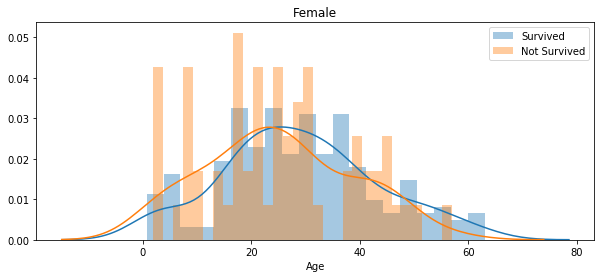

In [119]:
females_survived = female[female['Survived']==1]
females_survived = pd.DataFrame(females_survived)
females_not_survived = female[female['Survived']==0]
females_not_survived = pd.DataFrame(females_not_survived)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 4))
ax = sns.distplot(females_survived.Age.dropna(), bins=20, label = 'Survived')
ax = sns.distplot(females_not_survived.Age.dropna(), bins=30, label = 'Not Survived')
ax.legend()
ax.set_title('Female')

Text(0.5, 1.0, 'Male')

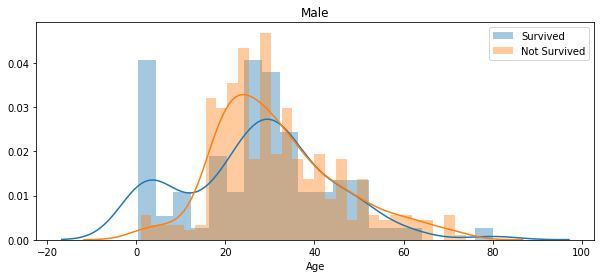

In [120]:
males_survived = male[male['Survived']==1]
males_survived = pd.DataFrame(males_survived)
males_not_survived = male[male['Survived']==0]
males_not_survived = pd.DataFrame(males_not_survived)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 4))
ax = sns.distplot(males_survived.Age.dropna(), bins= 20, label = 'Survived')
ax = sns.distplot(males_not_survived.Age.dropna(), bins=30, label = 'Not Survived')
ax.legend()
ax.set_title('Male')